In [4]:
import tensorflow as tf
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [5]:
model = tf.keras.models.load_model("BioOrNonBioModel.h5")

2025-07-06 08:46:08.725085: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [8]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 70, 70, 3)    0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 32, 32, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 32, 32, 64)   256         ['conv1_conv[0][0]']             
                                                                                              

In [7]:
import streamlit as st
from PIL import Image
import numpy as np
import tensorflow as tf

# Load the model once at the top
@st.cache_resource
def load_model():
    return tf.keras.models.load_model("BioOrNonBioModel.h5")

model = load_model()

# Function to preprocess the image
def preprocess_image(image, target_size=(64, 64)):
    image = image.resize(target_size)
    image = np.array(image) / 255.0  # normalize
    if image.shape[-1] == 4:  # if PNG with alpha channel
        image = image[..., :3]
    image = np.expand_dims(image, axis=0)  # add batch dimension
    return image

# Title
st.title("Biodegradable Material Classifier 🌱🧪")

# File uploader
uploaded_file = st.file_uploader("Upload an image...", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    image = Image.open(uploaded_file)
    st.image(image, caption="Uploaded Image", use_column_width=True)

    st.write("Predicting...")
    processed_image = preprocess_image(image)
    prediction = model.predict(processed_image)[0][0]  # sigmoid output

    # Threshold at 0.5
    if prediction >= 0.5:
        st.success(f"Prediction: **Biodegradable** 🌿 ({prediction:.2f})")
    else:
        st.error(f"Prediction: **Non-Biodegradable** 🧴 ({prediction:.2f})")

2025-07-06 10:15:45.445 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-06 10:15:45.834 
  command:

    streamlit run /home/developer/anaconda3/envs/Tensorflow/lib/python3.8/site-packages/ipykernel_launcher.py [ARGUMENTS]
2025-07-06 10:15:45.844 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-06 10:15:45.849 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-06 10:15:46.375 Thread 'Thread-5': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-06 10:15:46.444 Thread 'Thread-5': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-06 10:15:56.240 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-06 10:15:56.241 

In [12]:
image_path ="/home/developer/Coding/Kaggle/BioNonBioDegradable/BioNonBioDATA/TEST/B/TEST_BIODEG_HFL_1.jpg"

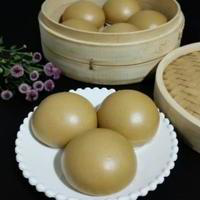

In [13]:
image = Image.open(image_path)
image

In [14]:
processed_image = preprocess_image(image)
prediction = model.predict(processed_image)

1/1 [==============================] - 5s 5s/step


In [21]:
prediction

array([[0.00014332]], dtype=float32)

In [26]:
prediction

array([0])

In [16]:
image_path ="/home/developer/Coding/Kaggle/BioNonBioDegradable/BioNonBioDATA/TEST/N/TEST_NBIODEG_ORI_10.jpg"

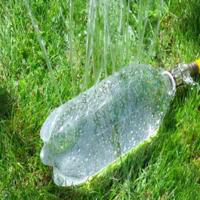

In [17]:
image = Image.open(image_path)
image

In [18]:
processed_image = preprocess_image(image)
prediction = model.predict(processed_image)

1/1 [==============================] - 1s 831ms/step


In [19]:
prediction

array([[0.00014332]], dtype=float32)

In [20]:
np.argmax(prediction, axis=1)[0]

0

In [27]:
prediction[0][0]

0.00014332354

In [29]:
processed_image.shape

(1, 64, 64, 3)

In [ ]:
import streamlit as st
from PIL import Image
import numpy as np
import tensorflow as tf

# Load the model once at the top
@st.cache_resource
def load_model():
    return tf.keras.models.load_model("model.h5")

model = load_model()

# Function to preprocess the image
def preprocess_image(image, target_size=(224, 224)):
    image = image.resize(target_size)
    image = np.array(image) / 255.0  # normalize
    if image.shape[-1] == 4:  # if PNG with alpha channel
        image = image[..., :3]
    image = np.expand_dims(image, axis=0)  # add batch dimension
    return image

# Title
st.title("Biodegradable Material Classifier 🌱🧪")

# File uploader
uploaded_file = st.file_uploader("Upload an image...", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    # Display the uploaded image
    image = Image.open(uploaded_file)
    st.image(image, caption="Uploaded Image", use_column_width=True)

    # Preprocess and predict
    st.write("Classifying...")
    processed_image = preprocess_image(image)
    prediction = model.predict(processed_image)

    # You can use a threshold or argmax depending on your model
    pred_class = np.argmax(prediction, axis=1)[0] if prediction.shape[-1] > 1 else int(prediction[0][0] > 0.5)

    label = "Biodegradable 🌿" if pred_class == 1 else "Non-Biodegradable 🧴"
    st.success(f"Prediction: **{label}**")


In [ ]:
import streamlit as st
from PIL import Image
import numpy as np
import tensorflow as tf

# Load the trained model (once)
@st.cache_resource
def load_model():
    return tf.keras.models.load_model("/home/developer/Coding/Kaggle/BioNonBioDegradable/BioOrNonBioModel.h5")

model = load_model()

# Preprocessing function for images
def preprocess_image(image, target_size=(64, 64)):
    image = image.resize(target_size)
    #image = np.array(image) / 255.0  # normalize pixel values
    # if image.shape[-1] == 4:  # drop alpha channel if present
    #     image = image[..., :3]
    image = np.expand_dims(image, axis=0)  # add batch dimension
    return image

# UI
st.title("Biodegradable Material Classifier 🌱")

uploaded_file = st.file_uploader("Upload an image of the item", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    image = Image.open(uploaded_file)
    st.image(image, caption="Uploaded Image", use_column_width=True)

    st.write("Predicting...")
    processed_image = preprocess_image(image)
    prediction = model.predict(processed_image)[0][0]  # sigmoid output

    # Threshold at 0.5
    if prediction >= 0.5:
        st.success(f"Prediction: **Biodegradable** 🌿 ({prediction:.2f})")
    else:
        st.error(f"Prediction: **Non-Biodegradable** 🧴 ({prediction:.2f})")


In [ ]:
### Final version

In [ ]:
import streamlit as st
from PIL import Image
import numpy as np
import tensorflow as tf

# Load the trained model (once)
@st.cache_resource
def load_model():
    return tf.keras.models.load_model("/home/developer/Coding/Kaggle/BioNonBioDegradable/BioOrNonBioModel.h5")

model = load_model()

# Preprocessing function for images
def preprocess_image(image, target_size=(64, 64)):
    image = image.resize(target_size)
    #image = np.array(image) / 255.0  # normalize pixel values
    # if image.shape[-1] == 4:  # drop alpha channel if present
    #     image = image[..., :3]
    image = np.expand_dims(image, axis=0)  # add batch dimension
    return image

# UI
st.title("Biodegradable Material Classifier 🌱")

uploaded_file = st.file_uploader("Upload an image of the item", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    image = Image.open(uploaded_file)
    st.image(image, caption="Uploaded Image", use_column_width=True)

    st.write("Predicting...")
    processed_image = preprocess_image(image)
    prediction = model.predict(processed_image)[0][0]  # sigmoid output

    # Threshold at 0.5
    if prediction >= 0.5:
        st.error(f"Prediction: **Non-Biodegradable** 🧴 ({prediction:.2f})")
    else:
        st.success(f"Prediction: **Biodegradable** 🌿 ({prediction:.2f})")                                            